# Cyber Data Analytics Assigmnent 2

# Familiarization Task

### Import pakages

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

### Loading datasets

In [2]:
#load the files
normal_data = pd.read_csv('training_dataset_01.csv')
attacked_data = pd.read_csv('training_dataset_02.csv')
test_data = pd.read_csv('BATADAL_test_dataset.csv')

#   dataset preprocessing
#   blank space removal (attacked_data)
attacked_data.columns = attacked_data.columns.str.strip()

#   transform the dates to datatime format
attacked_data['DATETIME'] = pd.to_datetime(attacked_data['DATETIME'])
normal_data['DATETIME'] = pd.to_datetime(normal_data['DATETIME'])
test_data['DATETIME'] = pd.to_datetime(test_data['DATETIME'])

#   set the datetime as the index of the dataframe
attacked_data.set_index('DATETIME', inplace=True)
normal_data.set_index('DATETIME', inplace=True)
test_data.set_index('DATETIME', inplace=True)

### Analyzing the data

In [22]:
#   Examine if both datasets contain the same number and type of columns
res = attacked_data.columns == normal_data.columns
if False not in res:
    res = True
else:
    res = False
print("Datasets contain the same number and type of columns: ", res)

#   Number of signals (columns) and their names
print("We have %s columns:  " %len(attacked_data.columns))

#   There is one column for the date and one for the label
print("From them %d are signals:    " %(len(attacked_data.columns)-2))

#   Drop the label column (as it does not represent any signal)
normal_data_heatmap = normal_data.drop(['ATT_FLAG'], axis=1)
attacked_data_heatmap = attacked_data.drop(['ATT_FLAG'], axis=1)
# normal_data_heatmap = normal_data
# attacked_data_heatmap = attacked_data

Datasets contain the same number and type of columns:  True
We have 44 columns:  
From them 42 are signals:    


In [29]:
#   The types of singals
print("Types of signals:    ")
for i in attacked_data_heatmap:
    print(i)

Types of signals:    
L_T1
L_T2
L_T3
L_T4
L_T5
L_T6
L_T7
F_PU1
S_PU1
F_PU2
S_PU2
F_PU3
S_PU3
F_PU4
S_PU4
F_PU5
S_PU5
F_PU6
S_PU6
F_PU7
S_PU7
F_PU8
S_PU8
F_PU9
S_PU9
F_PU10
S_PU10
F_PU11
S_PU11
F_V2
S_V2
P_J280
P_J269
P_J300
P_J256
P_J289
P_J415
P_J302
P_J306
P_J307
P_J317
P_J14
P_J422


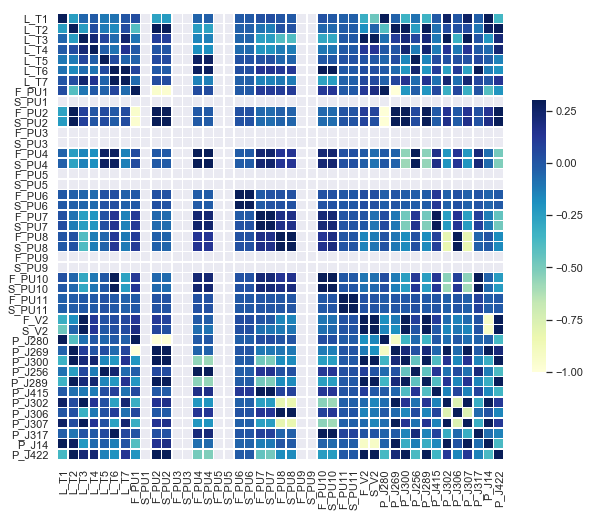

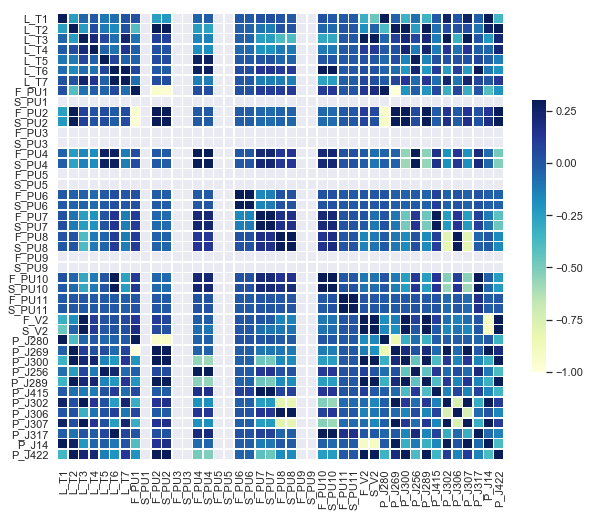

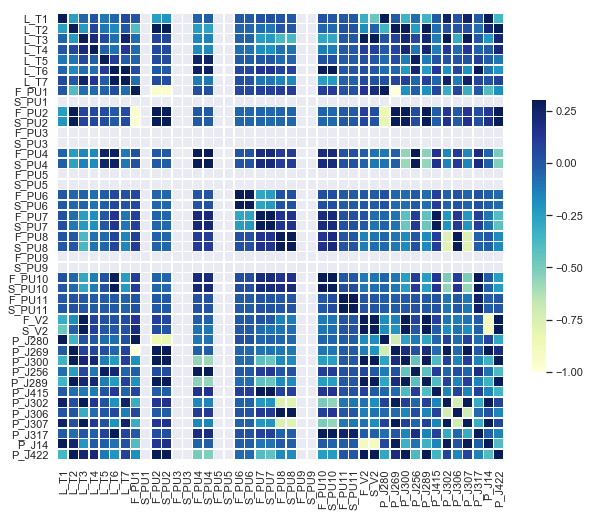

In [30]:
#   Show correlation of signals
frames_normal_normal = [normal_data_heatmap, normal_data_heatmap]
frames_attacked_attacked = [attacked_data_heatmap, attacked_data_heatmap]
frames_normal_attacked = [normal_data_heatmap, attacked_data_heatmap]

combined_n_n = pd.concat(frames_normal_normal)
combined_n_a = pd.concat(frames_normal_attacked)
combined_a_a = pd.concat(frames_attacked_attacked)

corr_n_n = combined_n_n.corr()
corr_n_a = combined_n_a.corr()
corr_a_a = combined_a_a.corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.set()
cmap = sns.cm.rocket_r
sns.heatmap(corr_n_n, linewidth=0.5, cmap="YlGnBu", vmax=.3, square=True,
            xticklabels=corr_n_n.columns.values, yticklabels=corr_n_n.columns.values,
            linewidths=0.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
sns.set()
cmap = sns.cm.rocket_r
sns.heatmap(corr_n_a, linewidth=0.5, cmap="YlGnBu", vmax=.3, square=True,
            xticklabels=corr_n_a.columns.values, yticklabels=corr_n_a.columns.values,
            linewidths=0.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(10, 10))
sns.set()
cmap = sns.cm.rocket_r
sns.heatmap(corr_a_a, linewidth=0.5,  cmap="YlGnBu", vmax=.3, square=True,
            xticklabels=corr_a_a.columns.values, yticklabels=corr_a_a.columns.values,
            linewidths=0.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

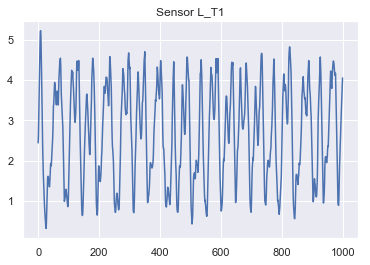

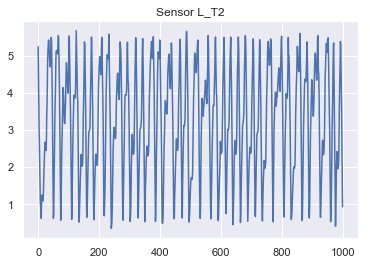

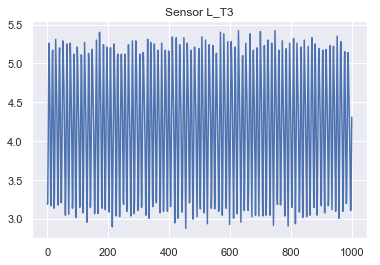

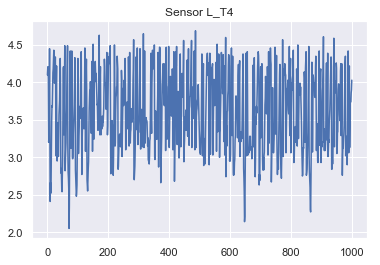

In [15]:
signal_names = normal_data.columns
#visualize some of the signals
plt.title('Sensor %s' %signal_names[0])
attack1=attacked_data[signal_names[0]]
plt.plot(np.asarray(attack1[0:1000]))
plt.show()

plt.title('Sensor %s' %signal_names[1])
attack2=attacked_data[signal_names[1]]
plt.plot(np.asarray(attack2[0:1000]))
plt.show()

plt.title('Sensor %s' %signal_names[2])
attack3=attacked_data[signal_names[2]]
plt.plot(np.asarray(attack3[0:1000]))
plt.show()

plt.title('Sensor %s' %signal_names[3])
attack4=attacked_data[signal_names[3]]
plt.plot(np.asarray(attack4[0:1000]))
plt.show()



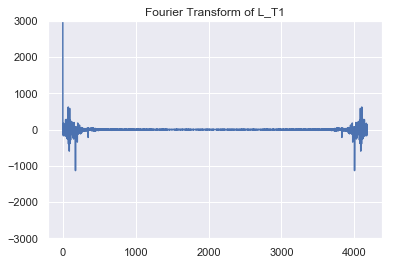

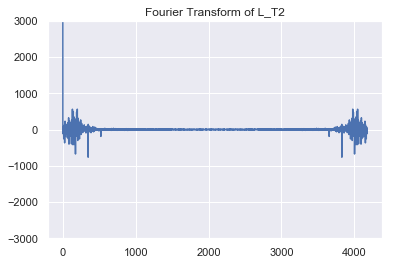

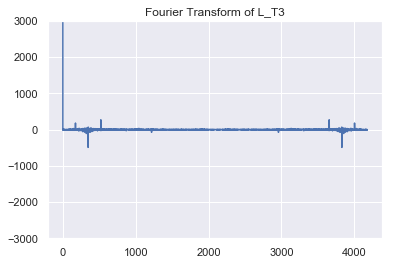

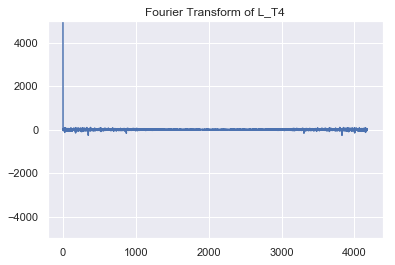

In [17]:
#investigate if the signals have cyclic behavior
#we will use fft for that purpose
plt.plot(np.fft.fft(attacked_data[signal_names[0]]))
plt.ylim([-3000, 3000])
plt.title('Fourier Transform of %s' %signal_names[0])
plt.show()

plt.plot(np.fft.fft(attacked_data[signal_names[1]]))
plt.title('Fourier Transform of %s' %signal_names[1])
plt.ylim([-3000, 3000])
plt.show()

plt.plot(np.fft.fft(attacked_data[signal_names[2]]))
plt.title('Fourier Transform of %s' %signal_names[2])
plt.ylim([-3000, 3000])
plt.show()

plt.plot(np.fft.fft(attacked_data[signal_names[3]]))
plt.ylim([-5000, 5000])
plt.title('Fourier Transform of %s' %signal_names[3])
plt.show()




### ARMA Prediction Model

### Import pakages

In [1]:
from statsmodels.tsa.arima_model import ARMA
import pandas as pd
from pandas import DataFrame
import sys
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf
import numpy as np
import warnings
import matplotlib.pyplot as plt
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Ploting function

In [2]:
def ploting(train):
    # autocorelation plot
    plot_acf(train, lags=50)
    # partial autocorelation plot
    plot_pacf(train, lags=50)
    plt.xlabel('lags')
    plt.show()

### Function that finds the correct order

In [3]:
def find_order (data, terms):
    if terms == "AR":
        lag = pacf(data, nlags=20, method='ols')
    elif terms =="MA":
        lag = acf(data, nlags=20)
    thres = 1.96/np.sqrt(len(data))
    for i,val in enumerate(lag):
        if val<thres:
            break
    return (i-1)

### Function that finds the correct order more accuratly by using the aic criterion

In [4]:
def aic_estimation(ar, ma, train):
    ars = list(range(ar + 1))
    mas = list(range(ma + 1))
    bestmodels =[]
    aics=[]
    for ar in ars:
        for ma in mas:
            try:
                # fit the model with this combination of parameters
                model_fit = ARMA(train, (ar, ma)).fit()
                aics.append(model_fit.aic)
            except:
                aics.append(np.nan)  # ignore error :The computed initial MA coefficients are not invertible
                pass

        # make grid search faster - move on to next signal if the improvements in AIC are not significant with higher ar order
        if ar > 1:
            prev_order = min(aics[-2 * len(mas):-len(mas)])
            cur_order = min(aics[-len(mas):])

            if (prev_order - cur_order < 0 or cur_order > 1.05 * prev_order):
                break
    keys = [str(ar) + "," + str(ma) for ar in ars for ma in mas]
    d = dict(zip(keys, aics))
    minaic = min(d, key=d.get)
    bestmodels.append(minaic)
    return bestmodels

### ARMA prediction function

In [5]:
def ARMA_per_singal(number_of_signal, signal_names, normal_data):
    #   Specifying the train and the test set
    train = normal_data[signal_names[number_of_signal]]

    # Call the ploting function for autocorrelation and partial autocorrelation plots
#     ploting(train)

    # Define a rough estimation of the ar and ma parameters
    ar = find_order(train, "AR")
    ma = find_order(train, "MA")

    # Make a more accurate estimation by making a grid search with the aic estimation
    estimation = aic_estimation(ar, ma, train)

    params = [par.split(',') for par in estimation]
    ar = int(params[0][0])
    ma = int(params[0][1])
    
    #   fit model
    train_1 = train[0:100]
    train_2 = train[100:400]
    model = ARMA(train_1, order=(ar, ma))
    model_fit = model.fit(disp=0)
#     print(model_fit.summary())

    #   plot residual errors
#     residuals = DataFrame(model_fit.resid)
#     residuals.plot()
    # plt.show()
    # residuals.plot(kind='kde')
    # plt.show()
#     print(residuals.describe())

    train_2 = train_2.values

    history = [x for x in train]
    predictions = list()
    residuals_all = list()
    for t in range(len(train_2)):
        model = ARMA(history, order=(ar, ma))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0][0]
        predictions.append(yhat)
        obs = train_2[t]
        history.append(obs)

        # print(abs(yhat - obs))
        residuals_all.append(abs(yhat - obs))
        print('predicted=%f, expected=%f' % (yhat, obs))
        print("Iteration ", t, "out of ", len(train_2))
    error = mean_squared_error(train_2, predictions)
    print('Test MSE: %.3f' % error)
    # plot

    length = list(range(0, len(predictions)))
    plt.plot(length, train_2[0:300])
    plt.plot(length, predictions[0:300])
    plt.show()


### Loading datasets

predicted=4.122312, expected=4.947467
Iteration  0 out of  300
predicted=5.504559, expected=4.696403
Iteration  1 out of  300
predicted=4.116832, expected=4.446137
Iteration  2 out of  300
predicted=4.272316, expected=4.107047
Iteration  3 out of  300
predicted=4.143002, expected=3.736316
Iteration  4 out of  300
predicted=3.377651, expected=3.442079
Iteration  5 out of  300
predicted=3.553160, expected=3.017942
Iteration  6 out of  300
predicted=2.895649, expected=3.289090
Iteration  7 out of  300
predicted=3.730834, expected=3.822708
Iteration  8 out of  300
predicted=4.263255, expected=4.275842
Iteration  9 out of  300
predicted=4.312956, expected=4.824705
Iteration  10 out of  300
predicted=5.157145, expected=5.347491
Iteration  11 out of  300
predicted=5.429273, expected=4.946361
Iteration  12 out of  300
predicted=4.281009, expected=4.549027
Iteration  13 out of  300
predicted=4.451352, expected=4.189444
Iteration  14 out of  300
predicted=4.061392, expected=3.790451
Iteration  1

predicted=3.772179, expected=3.830588
Iteration  128 out of  300
predicted=4.179251, expected=4.337024
Iteration  129 out of  300
predicted=4.488209, expected=4.764793
Iteration  130 out of  300
predicted=4.947352, expected=5.225001
Iteration  131 out of  300
predicted=5.313905, expected=5.056615
Iteration  132 out of  300
predicted=4.639086, expected=4.663383
Iteration  133 out of  300
predicted=4.390609, expected=4.245763
Iteration  134 out of  300
predicted=4.090486, expected=3.902088
Iteration  135 out of  300
predicted=3.728282, expected=3.481695
Iteration  136 out of  300
predicted=3.368115, expected=3.086540
Iteration  137 out of  300
predicted=3.040965, expected=3.279129
Iteration  138 out of  300
predicted=3.697247, expected=3.715827
Iteration  139 out of  300
predicted=4.031526, expected=4.129523
Iteration  140 out of  300
predicted=4.267750, expected=4.608655
Iteration  141 out of  300
predicted=4.880865, expected=5.086452
Iteration  142 out of  300
predicted=5.181740, expec

predicted=4.171538, expected=3.937507
Iteration  255 out of  300
predicted=3.688966, expected=3.511160
Iteration  256 out of  300
predicted=3.435660, expected=3.001334
Iteration  257 out of  300
predicted=2.861171, expected=3.378206
Iteration  258 out of  300
predicted=3.973623, expected=3.730461
Iteration  259 out of  300
predicted=3.914955, expected=4.133369
Iteration  260 out of  300
predicted=4.256097, expected=4.541237
Iteration  261 out of  300
predicted=4.841984, expected=5.022485
Iteration  262 out of  300
predicted=5.082772, expected=5.358318
Iteration  263 out of  300
predicted=5.346824, expected=5.130664
Iteration  264 out of  300
predicted=4.730443, expected=4.902834
Iteration  265 out of  300
predicted=4.726200, expected=4.612894
Iteration  266 out of  300
predicted=4.444295, expected=4.303768
Iteration  267 out of  300
predicted=4.059284, expected=4.013700
Iteration  268 out of  300
predicted=3.954754, expected=3.601924
Iteration  269 out of  300
predicted=3.412154, expec

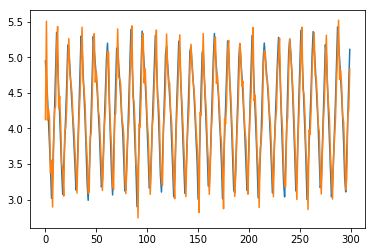

In [6]:
#   load the files
normal_data = pd.read_csv('training_dataset_01.csv')

#   transform the dates to datatime format
normal_data['DATETIME'] = pd.to_datetime(normal_data['DATETIME'])

#   set the datetime as the index of the dataframe
normal_data.set_index('DATETIME', inplace=True)

signal_names = normal_data.columns

# Choose a signal
number_of_signal = 2

# Call the function in order to make the predictions
ARMA_per_singal(number_of_signal, signal_names, normal_data)

# ARMA Task

### Import packages

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import numpy as np
import statsmodels.api as sm


from pandas import DataFrame
import sys
from sklearn.metrics import mean_squared_error
import warnings
import copy
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Define threshold value with SARIMAX model by using the first and the second train set

In [7]:
def SARIMAX_per_singal(number_of_signal, signal_names, normal_data, attacked_data):
    #   Specifying the train and the test set
    train = normal_data[signal_names[number_of_signal]]
    test = attacked_data[signal_names[number_of_signal]]

    # Call the ploting function for autocorrelation and partial autocorrelation plots
    # ploting(train)

    # Define a rough estimation of the ar and ma parameters
    ar = find_order(train, "AR")
    ma = find_order(train, "MA")

    # Make a more accurate estimation by making a grid search with the aic estimation
    estimation = aic_estimation(ar, ma, train)

    params = [par.split(',') for par in estimation]
    ar = int(params[0][0])
    ma = int(params[0][1])

    #   plot residual errors
    # residuals = DataFrame(model_fit.resid)
    # residuals.plot()
    # plt.show()
    # residuals.plot(kind='kde')
    # plt.show()
    # print(residuals.describe())


    train = train.values
    test = test.values

    history = [x for x in train]
    predictions = list()
    residuals_all = list()
    
    # using a small part of the train_2 to avoid the gap between the datasets
    train_2 = test[0:20]
    new_train = np.concatenate((train, train_2), axis=0)
    train = new_train
    model = sm.tsa.SARIMAX(train, order=(ar, 0, ma))
    param = [ar, 0, ma]
    spar = [0] * (int(param[0]) + int(param[1]) + int(param[2]) + 1)
    spar[-1] = 1
    model_fit = model.fit(start_params=spar)


    for t in range(len(test)):

        model_v = sm.tsa.SARIMAX(history,  order=(int(param[0]), int(param[1]), int(param[2])))
        
        # using the parameters from the train set 1 without updating them
        # we reduce the error(anomaly) propagation
        # without updating the parameters the algorithms runs faster
        model_fit_2 = model_v.smooth(model_fit.params)
        output = model_fit_2.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        residuals_all.append(abs(yhat - obs))
#         print("Iteration ", t, "out of ", len(test))
#         print('predicted=%f, expected=%f' % (yhat, obs))

    length = list(range(0, len(predictions)))

    plt.plot(length, test)
    plt.plot(length, predictions)
    plt.show()

    # We check the largest and the smalles residual when there is anomaly
    # We choose the smallest residual as threshold

    true_labels = attacked_data["ATT_FLAG"].values

    counts = 0
    attacked_hours = list()
    for i in true_labels:
        if i == 1:
            attacked_hours.append(counts)
        counts += 1

    attacked_residuals = list()
    for i in attacked_hours:
        attacked_residuals.append(residuals_all[i])

    minimium_attacked_residual = min(attacked_residuals)
#     print(minimium_attacked_residual)

    count = 0
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i in residuals_all:
        if i >= minimium_attacked_residual and true_labels[count] == 1:
            TP += 1
        elif i >= minimium_attacked_residual and true_labels[count] != 1:
            FP += 1
        elif i < minimium_attacked_residual and true_labels[count] == 1:
            FN += 1
        elif i < minimium_attacked_residual and true_labels[count] != 1:
            TN += 1
        count += 1

    return minimium_attacked_residual




### Anomaly Detection on test set

In [8]:
def Anomaly_detection(number_of_signal, signal_names, normal_data, test_data, true_labels):
    #   Specifying the train and the test set
    train = normal_data[signal_names[number_of_signal]]
    test = test_data[signal_names[number_of_signal]]

    # Call the ploting function for autocorrelation and partial autocorrelation plots
    # ploting(train)

    # Define a rough estimation of the ar and ma parameters
    ar = find_order(train, "AR")
    ma = find_order(train, "MA")

    # Make a more accurate estimation by making a grid search with the aic estimation
    estimation = aic_estimation(ar, ma, train)

    params = [par.split(',') for par in estimation]
    ar = int(params[0][0])
    ma = int(params[0][1])

    train = train.values
    test = test.values

    history = [x for x in train]
    predictions = list()
    residuals_all = list()
    
    # using a small part of the train_2 to avoid the gap between the datasets
    train_2 = test[0:20]
    new_train = np.concatenate((train, train_2), axis=0)
    train = new_train
    model = sm.tsa.SARIMAX(train, order=(ar, 0, ma))
    param = [ar, 0, ma]
    spar = [0] * (int(param[0]) + int(param[1]) + int(param[2]) + 1)
    spar[-1] = 1
    model_fit = model.fit(start_params=spar)


    for t in range(len(test)):

        model_v = sm.tsa.SARIMAX(history,  order=(int(param[0]), int(param[1]), int(param[2])))
        
        # using the parameters from the train set 1 without updating them
        # we reduce the error(anomaly) propagation
        # without updating the parameters the algorithms runs faster
        model_fit_2 = model_v.smooth(model_fit.params)
        output = model_fit_2.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        residuals_all.append(abs(yhat - obs))
#         print("Iteration ", t, "out of ", len(test))
#         print('predicted=%f, expected=%f' % (yhat, obs))

    length = list(range(0, len(predictions)))

    plt.plot(length, test)
    plt.plot(length, predictions)
    plt.show()

    count = 0
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i in residuals_all:
        if i >= threshold and true_labels[count] == 1:
            TP += 1
        elif i >= threshold and true_labels[count] != 1:
            FP += 1
        elif i < threshold and true_labels[count] == 1:
            FN += 1
        elif i < threshold and true_labels[count] != 1:
            TN += 1
        count += 1
        
        print("Training True Positives:  ", TP)
        print("Training False Positives:  ", FP)
        print("Training False Negatives:  ", FN)
        print("Training True Negatives:  ", TN)

    return TP, FP, FN, TN


### Loading test set

In [9]:
#   load the test set
test_data = pd.read_csv('BATADAL_test_dataset.csv')
normal_data = pd.read_csv('training_dataset_01.csv')
attacked_data = pd.read_csv('training_dataset_02.csv')

#   dataset preprocessing
#   blank space removal (attacked_data)
attacked_data.columns = attacked_data.columns.str.strip()

#   transform the dates to datatime format
test_data['DATETIME'] = pd.to_datetime(test_data['DATETIME'])
normal_data['DATETIME'] = pd.to_datetime(normal_data['DATETIME'])
attacked_data['DATETIME'] = pd.to_datetime(attacked_data['DATETIME'])

#   set the datetime as the index of the dataframe
test_data.set_index('DATETIME', inplace=True)
normal_data.set_index('DATETIME', inplace=True)
attacked_data.set_index('DATETIME', inplace=True)

signal_names = normal_data.columns

### Consctructing labels

In [ ]:
number_of_signal = 0
test = test_data[signal_names[number_of_signal]]
labels = np.ones(len(test.values))
labels = -1*labels
labels[297:368] = 1
labels[632:698] = 1
labels[867:899] = 1
labels[937:969] = 1
labels[1229:1330] = 1
labels[1574:1655] = 1
labels[1940:1971] = 1


### Predicting Attackes by looking on signal 0

In [ ]:
number_of_singal = 0
threshold = SARIMAX_per_singal(number_of_signal, signal_names, normal_data, attacked_data)
print("Threshold value: ", threshold)
[TP, FP, FN, TN] = Anomaly_detection(number_of_signal, signal_names, normal_data, test_data, labels)

print("True Positives:  ", TP)
print("False Positives:  ", FP)
print("False Negatives:  ", FN)
print("True Negatives:  ", TN)

### Predicting Attackes by looking on signal 1

In [ ]:
number_of_singal = 1
threshold = SARIMAX_per_singal(number_of_signal, signal_names, normal_data, attacked_data)
print("Threshold value: ", threshold)
[TP, FP, FN, TN] = Anomaly_detection(number_of_signal, signal_names, normal_data, test_data, labels)

print("True Positives:  ", TP)
print("False Positives:  ", FP)
print("False Negatives:  ", FN)
print("True Negatives:  ", TN)

### Predicting Attackes by looking on signal 2

In [ ]:
number_of_singal = 2
threshold = SARIMAX_per_singal(number_of_signal, signal_names, normal_data, attacked_data)
print("Threshold value: ", threshold)
[TP, FP, FN, TN] = Anomaly_detection(number_of_signal, signal_names, normal_data, test_data, labels)

print("True Positives:  ", TP)
print("False Positives:  ", FP)
print("False Negatives:  ", FN)
print("True Negatives:  ", TN)

### Predicting Attackes by looking on signal 3

In [ ]:
number_of_singal = 3
threshold = SARIMAX_per_singal(number_of_signal, signal_names, normal_data, attacked_data)
print("Threshold value: ", threshold)
[TP, FP, FN, TN] = Anomaly_detection(number_of_signal, signal_names, normal_data, test_data, labels)

print("True Positives:  ", TP)
print("False Positives:  ", FP)
print("False Negatives:  ", FN)
print("True Negatives:  ", TN)

### Predicting Attackes by looking on signal 4

In [ ]:
number_of_singal = 4
threshold = SARIMAX_per_singal(number_of_signal, signal_names, normal_data, attacked_data)
print("Threshold value: ", threshold)
[TP, FP, FN, TN] = Anomaly_detection(number_of_signal, signal_names, normal_data, test_data, labels)

print("True Positives:  ", TP)
print("False Positives:  ", FP)
print("False Negatives:  ", FN)
print("True Negatives:  ", TN)